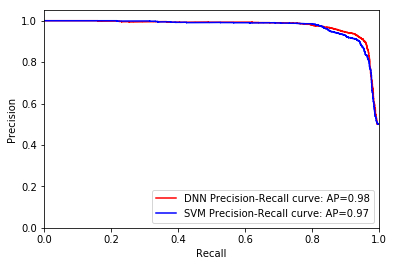

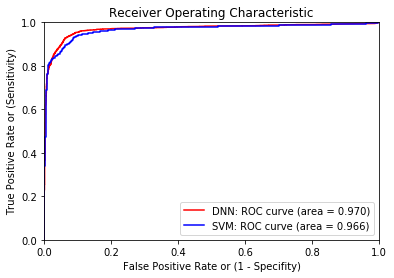

In [23]:
import sys
sys.path.append('./libs')
import os
import shutil
import util_fasta, util_caracteristicas
from sklearn.externals.joblib import Parallel, delayed, dump, load
import hashlib
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
import hashlib
import util_fasta
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils import to_categorical

#datos_svm = load("../Semana 10/datos_svm.bin")
datos_dnn = load("../Semana 11/datos_dnn.bin")

(y_true, y_pred, probs, recall, precision, average_precision, fpr, tpr, roc_auc) = datos_dnn
plt.figure(1)
plt.step(recall, precision, color='r', where='post', label='DNN Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
#plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

(y_true, y_pred, probs, recall, precision, average_precision, fpr, tpr, roc_auc) = datos_svm
plt.step(recall, precision, color='b', where='post', label='SVM Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

plt.legend(loc="lower right")

(y_true, y_pred, probs, recall, precision, average_precision, fpr, tpr, roc_auc) = datos_dnn
plt.figure(2)
plt.plot(fpr, tpr, color='r', label='DNN: ROC curve (area = %0.3f)' % roc_auc)
#plt.plot([0, 1], [0, 1], linestyle='--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')

(y_true, y_pred, probs, recall, precision, average_precision, fpr, tpr, roc_auc) = datos_svm
plt.plot(fpr, tpr, color='b', label='SVM: ROC curve (area = %0.3f)' % roc_auc)

plt.legend(loc="lower right")